In [1]:
import tensorflow as tf


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPool1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Embedding

In [5]:
df=pd.read_csv('../input/spamcsv/spam.csv',encoding='ISO-8859-1')


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
#drop garbage columns
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#rename the columns
df.columns=['Labels','Data']

In [10]:
df.head()

,Labels,Data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#create a binary label
df['bin_labels']=df['Labels'].map({'ham':0,'spam':1})

In [12]:
y=df['bin_labels'].values

In [13]:
print(y)

[0 0 1 ... 0 0 0]


In [14]:
x=df['Data']

In [15]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Data, Length: 5572, dtype: object

In [16]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=0)

In [17]:
#convert sentence into tokens
max_vocab_size=20000
tokenizer=Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)



In [18]:
print(x_train)

1245    Hello which the site to download songs its urg...
787     Ever thought about living a good life with a p...
4840    Hmmm.... Mayb can try e shoppin area one, but ...
4916    This is the 2nd time we have tried 2 contact u...
3650         Want to send me a virtual hug?... I need one
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: Data, Length: 3733, dtype: object


In [19]:
#to check the number of words in the vocabulary
word2index=tokenizer.word_index
V=len(word2index)
print('Total no of tokens are: ',V)

Total no of tokens are:  7150


In [20]:
word2index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'in': 7,
 'and': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'of': 14,
 'it': 15,
 'call': 16,
 'have': 17,
 'that': 18,
 '2': 19,
 'on': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'do': 28,
 'at': 29,
 'if': 30,
 'get': 31,
 "i'm": 32,
 'ur': 33,
 'be': 34,
 'with': 35,
 'just': 36,
 'we': 37,
 'will': 38,
 'this': 39,
 'no': 40,
 '4': 41,
 'up': 42,
 'lt': 43,
 'gt': 44,
 'when': 45,
 'ok': 46,
 'go': 47,
 'all': 48,
 'out': 49,
 'what': 50,
 'free': 51,
 'from': 52,
 'how': 53,
 'know': 54,
 'then': 55,
 'like': 56,
 'am': 57,
 'its': 58,
 'good': 59,
 'got': 60,
 'come': 61,
 'day': 62,
 'time': 63,
 'only': 64,
 'was': 65,
 'send': 66,
 'want': 67,
 'love': 68,
 'there': 69,
 'txt': 70,
 'stop': 71,
 'going': 72,
 'home': 73,
 'he': 74,
 'text': 75,
 'need': 76,
 'as': 77,
 'about': 78,
 'one': 79,
 'r': 80,
 'by': 81,
 'lor': 82,
 "i'll": 83,
 'still': 84,
 'so

In [21]:
#convert sentence to sequence
sequences_train=tokenizer.texts_to_sequences(x_train)

In [22]:
sequences_train[0]

[250, 266, 5, 1272, 2, 644, 1468, 58, 188, 117]

In [23]:
sequences_test=tokenizer.texts_to_sequences(x_test)

In [24]:
x_train

1245    Hello which the site to download songs its urg...
787     Ever thought about living a good life with a p...
4840    Hmmm.... Mayb can try e shoppin area one, but ...
4916    This is the 2nd time we have tried 2 contact u...
3650         Want to send me a virtual hug?... I need one
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: Data, Length: 3733, dtype: object

In [25]:
sequences_train[0]

[250, 266, 5, 1272, 2, 644, 1468, 58, 188, 117]

In [26]:
#pad sequences to get (NXT matrix)
data_train=pad_sequences(sequences_train)
#N= number of samples T: Number of time steps

In [27]:
data_train

array([[   0,    0,    0, ...,   58,  188,  117],
       [   0,    0,    0, ..., 2295, 3374,  257],
       [   0,    0,    0, ...,  267,   14, 1273],
       ...,
       [   0,    0,    0, ...,   80,  102,   21],
       [   0,    0,    0, ..., 1376,   56,    3],
       [   0,    0,    0, ...,  279,    2,    3]], dtype=int32)

In [28]:
print('data shape',data_train.shape)

data shape (3733, 162)


In [29]:
len(sequences_train[0])


10

In [30]:
len(sequences_train[10])

32

In [31]:
data_train[0]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [32]:
len(data_train[0])

162

In [33]:
len(data_train[1])

162

In [34]:
data_train.shape

(3733, 162)

In [35]:
#set the value of T to get sequence length
T=data_train.shape[1]

In [36]:
print(T)

162


In [37]:
#pad the test set
data_test=pad_sequences(sequences_test,maxlen=T)

In [38]:
data_test.shape

(1839, 162)

In [39]:
#Build the model
#create the model
#choose the embedding dimensionality


In [40]:
D=20 #This is a hyper parameter, we can choose any word vector size that we want

In [41]:
#input layer
i=Input(shape=(T,))
#every single 
#input layer takes in sequences of integers, So, Shape is T

In [42]:
#Embedding layer
x=Embedding(V+1,D)(i)
# This takes in sequences of integers and returns sequences of word vectors
#this will be N * T * D array
# We want size of embedding to (V+1) * D because the word index start from 1 and not 0 


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [43]:
## First CNN layer
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

In [44]:
## 2nd CNN layer
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)

In [45]:
## 3rd CNN layer
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPool1D()(x)

In [46]:
#Dense Layer
x=Dense(1, activation='sigmoid')(x)

In [47]:
model=Model(i,x)

In [48]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#Adam (Adaptive Moment Estimation) works with momentums of first and second order. 
#The intuition behind the Adam is that we don’t want to roll so fast just because
# we can jump over the minimum, we want to decrease the velocity a little bit for a careful search. 
#In addition to storing an exponentially decaying average of past squared gradients like AdaDelta,
# Adam also keeps an exponentially decaying average of past gradients M(t).

In [49]:
#train the model
r=model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

2022-01-04 16:14:51.397123: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
117/117 [==============================] - 3s 14ms/step - loss: 0.3828 - accuracy: 0.8628 - val_loss: 0.2879 - val_accuracy: 0.8581
Epoch 2/5
117/117 [==============================] - 1s 12ms/step - loss: 0.1195 - accuracy: 0.9529 - val_loss: 0.0686 - val_accuracy: 0.9853
Epoch 3/5
117/117 [==============================] - 1s 12ms/step - loss: 0.0181 - accuracy: 0.9949 - val_loss: 0.0570 - val_accuracy: 0.9859
Epoch 4/5
117/117 [==============================] - 1s 12ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.0607 - val_accuracy: 0.9880
Epoch 5/5
117/117 [==============================] - 1s 12ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0722 - val_accuracy: 0.9869


In [50]:
#The batch size is a number of samples processed before the model is updated.

#The number of epochs is the number of complete passes through the training dataset.

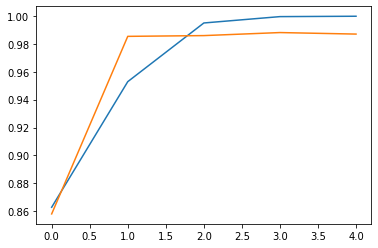

In [51]:
#Accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')

In [52]:
#RNN
y=Embedding(V+1,D)(i)

In [53]:
M=15
#hidden state vectorize(dimensionality)


In [54]:
## First CNN layer
y=LSTM(M,return_sequences=True)(y)
y=GlobalMaxPool1D()(y) 


In [55]:
y=Dense(1,activation='sigmoid')(y)


In [56]:
model=Model(i,y)

In [57]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [58]:
#train the model
r=model.fit(x=data_train,y=y_train,epochs=10,validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 11s 67ms/step - loss: 0.4933 - accuracy: 0.8612 - val_loss: 0.3836 - val_accuracy: 0.8581
Epoch 2/10
117/117 [==============================] - 8s 66ms/step - loss: 0.3410 - accuracy: 0.8698 - val_loss: 0.3458 - val_accuracy: 0.8581
Epoch 3/10
117/117 [==============================] - 7s 64ms/step - loss: 0.3136 - accuracy: 0.8698 - val_loss: 0.3243 - val_accuracy: 0.8581
Epoch 4/10
117/117 [==============================] - 8s 68ms/step - loss: 0.2866 - accuracy: 0.8698 - val_loss: 0.2924 - val_accuracy: 0.8581
Epoch 5/10
117/117 [==============================] - 8s 65ms/step - loss: 0.2526 - accuracy: 0.8698 - val_loss: 0.2587 - val_accuracy: 0.8581
Epoch 6/10
117/117 [==============================] - 8s 65ms/step - loss: 0.2174 - accuracy: 0.8698 - val_loss: 0.2222 - val_accuracy: 0.8581
Epoch 7/10
117/117 [==============================] - 8s 65ms/step - loss: 0.1835 - accuracy: 0.8840 - val_loss: 0.1868 - val_accuracy: 0.914